<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Simple_Linear_Regression_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data[data.duplicated()].shape

(0, 2)

In [9]:
#therefore we can see that there are no duplicate rows 
data[data.duplicated()]

,Delivery Time,Sorting Time


In [10]:
#renameing to make it more comfortable and to avoid error due to space
data1=data.rename({'Delivery Time':'dt','Sorting Time':'st'},axis=1)

In [11]:
data1

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
data1.isnull().sum()
#there are no null values

dt    0
st    0
dtype: int64

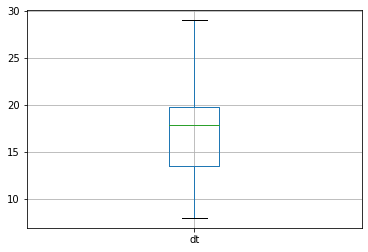

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
data1.boxplot(column=['dt'])

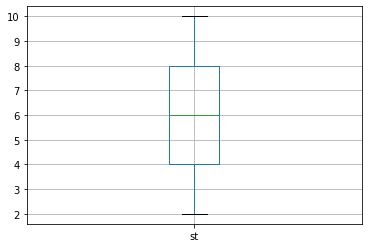

In [14]:
data1.boxplot(column=['st'])

In [15]:
#there are no outliers

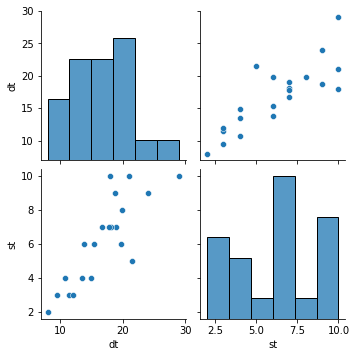

In [16]:
import seaborn as sns
sns.pairplot(data1)

In [17]:
#normalization
#converting to z-score
def z_conv(x):
    temp=(x-x.mean())/x.std()
    return temp


df_norm=z_conv(data1.iloc[:,0:2])

In [18]:
df_norm

,dt,st
0,0.829385,1.498616
1,-0.648476,-0.861704
2,0.583075,-0.074931
3,1.420530,1.105229
4,2.405771,1.498616
5,-0.283937,-0.074931
6,0.435289,0.318456
7,-1.436669,-1.255091
8,0.218536,1.498616
9,0.386027,1.105229


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


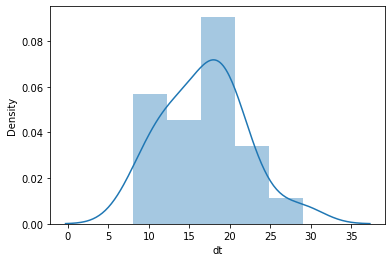

In [19]:
import seaborn as sns
sns.distplot(data1['dt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


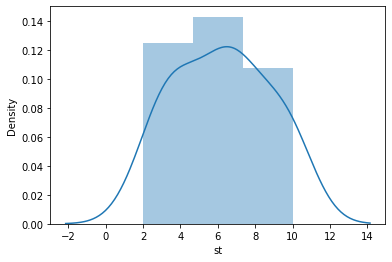

In [20]:
sns.distplot(data1['st'])

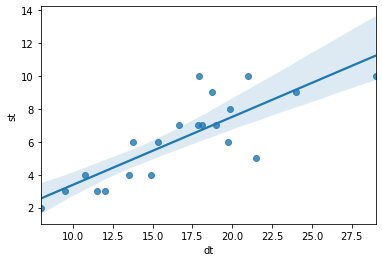

In [21]:
sns.regplot(x="dt", y="st", data=data1);

In [22]:
import statsmodels.formula.api as smf
model = smf.ols("st~dt",data = data1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        04:25:15   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
dt             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#coefficients
model.params

Intercept   -0.756673
dt           0.413744
dtype: float64

In [25]:
#t-values and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept   -0.667290
dt           6.387447
dtype: float64 
 Intercept    0.512611
dt           0.000004
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.682271474841723, 0.6655489208860242)